#### **Machine Learning Prediction of Customer Churn Status**

##### **Load the Required Libraries**|

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read the Dataset from the  Local Directory**

In [19]:
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


#### **Read the Imported Data as Data Frame**

In [20]:
df  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Check the Data Structure**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Chnage the Total Charges From Integer  to Numeric (Or Simply Coerce it to Numeric)**

In [22]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors = 'coerce')
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-1495206631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace = True)


#### **Convert all Object Variables to Categorical**

In [23]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### **Visualization of the Target Variable**

/tmp/ipython-input-4055626521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data = df, palette = 'viridis')


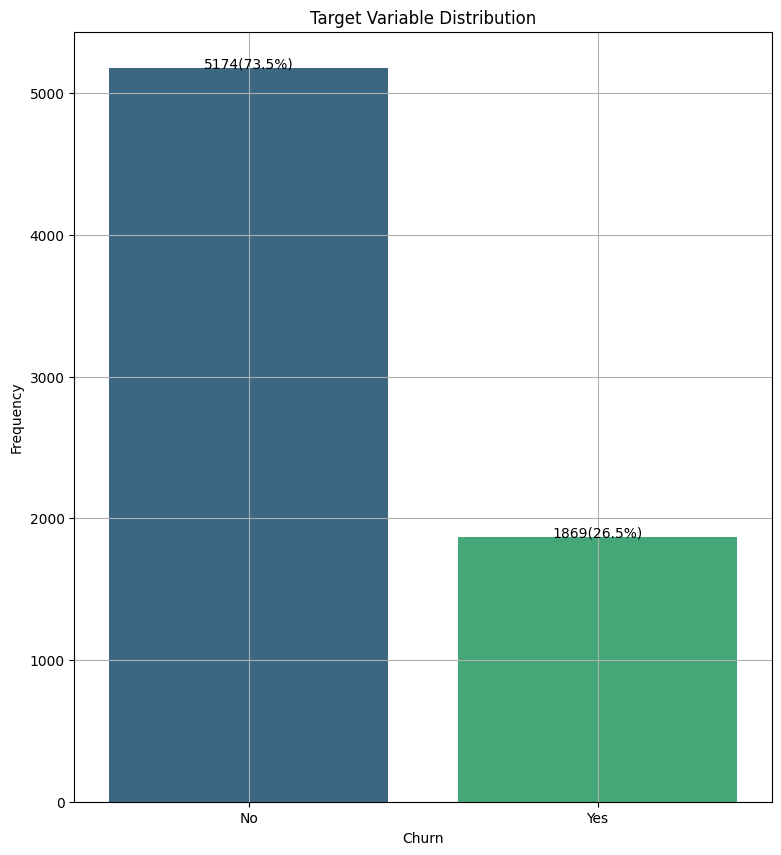

In [25]:
plt.figure(figsize=(9,10))
ax = sns.countplot(x='Churn', data = df, palette = 'viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Churn')
plt.ylabel('Frequency')

total = len(df['Churn'])
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height +3,
          f'{int(height)}({(height/total)*100:.1f}%)',
          ha='center')

plt.grid(True)
plt.show()

#### **Check for the Missing Values**

In [26]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#### **Create the Target Variable and the Preddictor Matrix**

In [27]:
X = df.drop(['Churn','customerID'], axis =1)
y = df['Churn']

#### **View the X-Matrix and the Target Variable**

In [16]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [28]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


#### **Create Dummies Variables**

In [29]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


##### **Convert the One-Hot Encoding to 1 and 0**

In [30]:
X = X.astype(int)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


#### **Split the Data into Training and Testing**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


##### **Develop the Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier

#### Initialization Process
rf_model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 4,
    min_samples_split= 5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state = 42)


### Training Process
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

#### **Prediction using the Estimated Random Forest Model**

In [49]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [50]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [51]:
y_test[:5]

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


#### **Model Performance and Confussion Matrix**

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

### Calculate the Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
conf_matrix =confusion_matrix(y_test, y_pred_rf)

#### **Print the Ressults**

In [53]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7424
Precision: 0.5083
F1 Score: 0.6292
Recall: 0.8257
Confusion Matrix:
[[738 298]
 [ 65 308]]


### **Plot the Confusion Matrix**

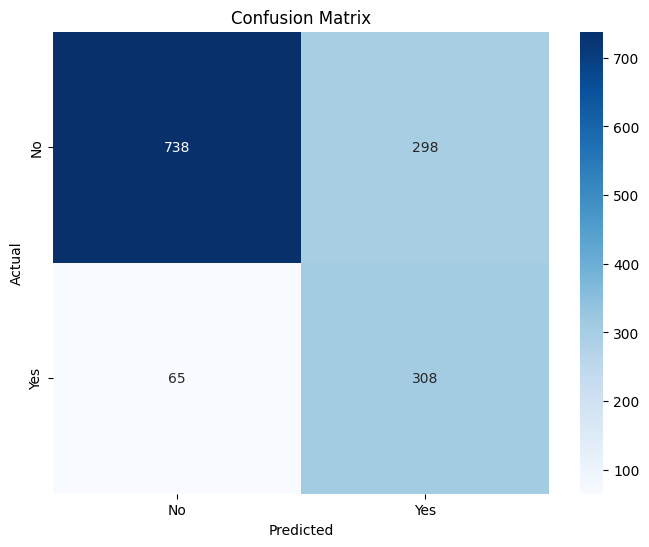

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Performance Report**

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.92      0.71      0.80      1036
         Yes       0.51      0.83      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



##### **Extract Decision  Trees from the Random Forest Model**

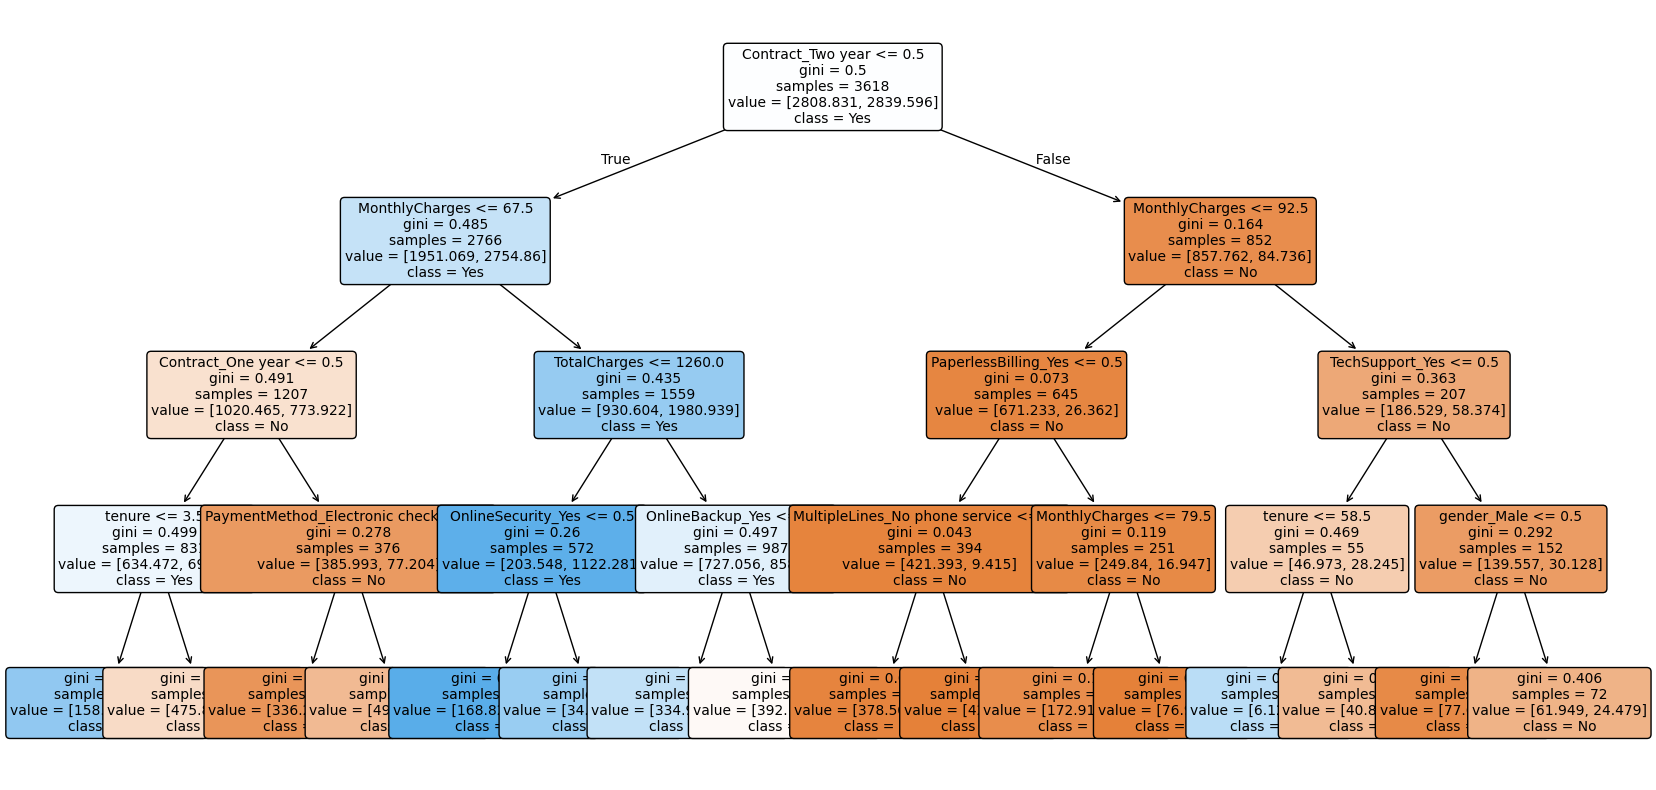

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

tree_to_plot = rf_model.estimators_[5]

plot_tree(tree_to_plot,
          feature_names=X_train.columns.tolist(),
          class_names=rf_model.classes_.tolist(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

#### **Extraction of Additional Model Performance Metrics**

In [58]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from statsmodels.stats.contingency_tables import mcnemar

# 1. Convert the prediction from categorical for numeric
y_pred_rf_numeric = np.array([1 if pred == 'Yes' else 0 for pred in y_pred_rf])
y_pred_rf_numeric[:5]


array([1, 0, 0, 1, 0])

In [59]:
y_test[:5]

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


In [61]:
# 2. Compute the Confusion Matrix
y_test_encoded = y_test.map({'Yes': 1, 'No': 0})
conf_matrix = confusion_matrix(y_test_encoded, y_pred_rf_numeric)
conf_matrix

array([[738, 298],
       [ 65, 308]])

In [64]:
# 3. Extract TN, FP, FN, TN
TN, FP, FN, TP = conf_matrix.ravel()

In [65]:
# 4. Sensity (Recall/ True Positive Rate)
sensitivity = TP / (TP + FN)

In [66]:
#. 5. Specificity
specificity = TN / (TN + FP)

In [67]:
# 6. False Positive Rate
fpr = FP / (FP + TN)

In [68]:
# 7 False Negative Rate
fnr = FN/ (FN + TP)

In [69]:
#### Print the Metrics
print(f"Sensitivity (Recall/ True Positive Rate): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"False Negative Rate: {fnr:.4f}")

Sensitivity (Recall/ True Positive Rate): 0.8257
Specificity: 0.7124
False Positive Rate: 0.2876
False Negative Rate: 0.1743
